# Import and Read

In [1]:
from IPython.core.display import display, HTML
from IPython import get_ipython as get_ipython
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important;margin-left:-30px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))


/var/folders/tj/2cbzjkv53dj9l4yrll73xw400000gq/T/ipykernel_30687/2968726470.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/clasdb_pi_plus_n.txt', delimiter='\t', header=None)
df.columns = ['Ebeam', 'W', 'Q2', 'cos(theta)', 'phi', 'dsigma/dOmega', 'error', 'id']

In [5]:
df.loc[8314:6567/1, 'Ebeam'] = 5.754

In [7]:
df.describe()

,Ebeam,W,Q2,cos(theta),phi,dsigma/dOmega,error
count,98027.000000,98027.000000,98027.000000,98027.000000,98027.000000,98027.000000,98027.000000
mean,5.311665,1.538507,2.459514,0.228695,178.862418,1.158558,0.191970
std,1.162868,0.234610,0.954122,0.564941,103.096616,2.169026,0.381228
min,1.515000,1.110000,0.300000,-0.923880,3.750000,0.003300,0.001649
25%,5.499000,1.330000,1.800000,-0.300000,82.500000,0.279800,0.062016
50%,5.748939,1.570000,2.440000,0.300000,176.250000,0.584100,0.093820
75%,5.754176,1.710000,3.150000,0.700000,266.250000,1.078540,0.153150
max,7.482960,2.010000,4.155000,0.991445,356.250000,38.710000,17.964336


# Top level analysis

In [5]:
df.head(5)

,Ebeam,W,Q2,cos(theta),phi,dsigma/dOmega,error,id
0,1.515,1.11,0.3,0.991445,15.0,15.370,5.264366,E8M1
1,1.515,1.11,0.3,0.991445,45.0,4.511,1.743136,E8M1
2,1.515,1.11,0.3,0.991445,75.0,4.478,1.611260,E8M1
3,1.515,1.11,0.3,0.991445,105.0,5.136,1.523529,E8M1
4,1.515,1.11,0.3,0.991445,135.0,5.078,1.219442,E8M1


In [6]:
pd.DataFrame({'isnull': df.isnull().sum(), 'dtypes': df.dtypes})

,isnull,dtypes
Ebeam,0,float64
W,0,float64
Q2,0,float64
cos(theta),0,float64
phi,0,float64
dsigma/dOmega,0,float64
error,0,float64
id,0,object


In [7]:
df.id.value_counts()

E141M119    465
E141M121    460
E141M128    456
E141M120    452
E141M116    452
           ... 
E8M68        73
E13M210      71
E8M84        37
E8M47        27
E141M160     24
Name: id, Length: 561, dtype: int64

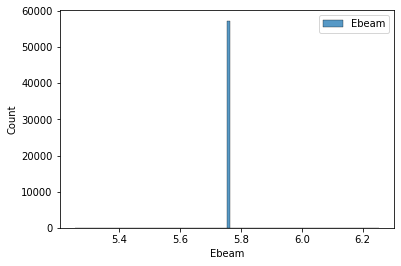

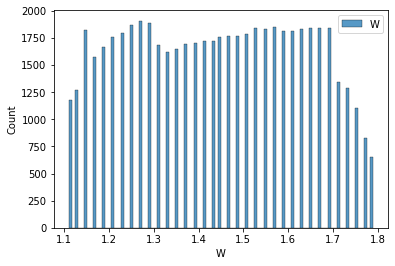

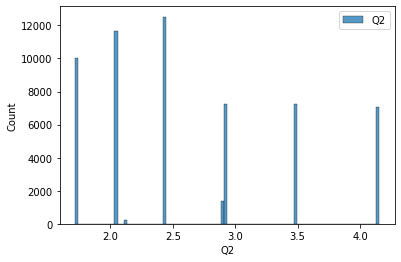

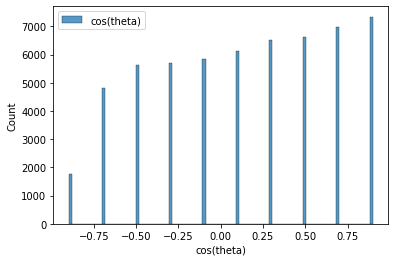

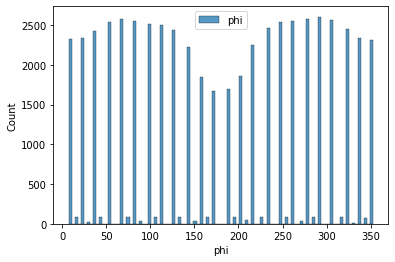

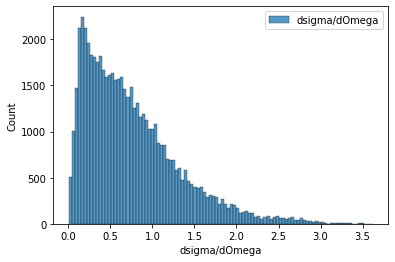

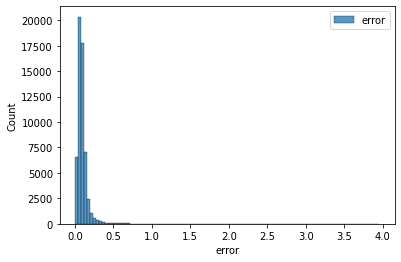

In [8]:
for i, col in enumerate(df.drop('id', axis=1).columns):
    sns.histplot(df[df.Ebeam==5.754][col], label=f'{col}', bins=100)
    plt.legend()
    plt.show()

In [12]:
df

,Ebeam,W,Q2,cos(theta),phi,dsigma/dOmega,error,id
0,1.515,1.11,0.3,0.991445,15.00,15.3700,5.264366,E8M1
1,1.515,1.11,0.3,0.991445,45.00,4.5110,1.743136,E8M1
2,1.515,1.11,0.3,0.991445,75.00,4.4780,1.611260,E8M1
3,1.515,1.11,0.3,0.991445,105.00,5.1360,1.523529,E8M1
4,1.515,1.11,0.3,0.991445,135.00,5.0780,1.219442,E8M1
...,...,...,...,...,...,...,...,...
98022,5.499,2.01,4.0,0.975000,213.75,0.1012,0.043165,E141M160
98023,5.499,2.01,4.0,0.975000,228.75,0.1199,0.076638,E141M160
98024,5.499,2.01,4.0,0.975000,266.25,0.1578,0.095391,E141M160
98025,5.499,2.01,4.0,0.975000,273.75,0.2346,0.158557,E141M160


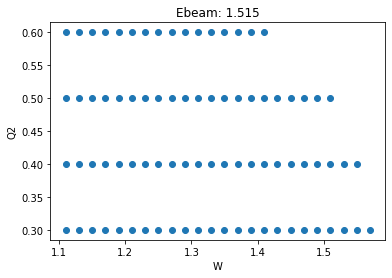

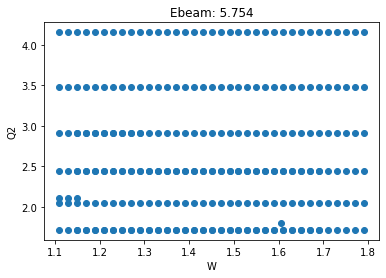

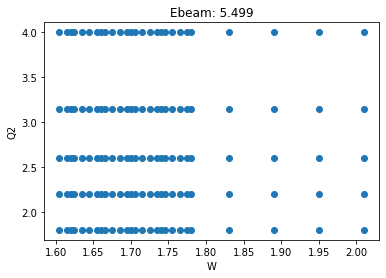

In [41]:
# df.groupby('Ebeam').agg({'W': pd.unique, 'Q2': pd.unique})

for i in df.Ebeam.unique():
    df_tmp = df[df.Ebeam == i][['W', 'Q2']].drop_duplicates()
    plt.scatter(df_tmp.to_numpy()[:, 0], df_tmp.to_numpy()[:, 1])
    plt.xlabel('W')
    plt.ylabel('Q2')
    plt.title(f'Ebeam: {i}')
    plt.show()

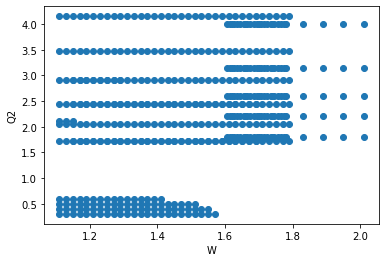

In [43]:
df_tmp = df[['W', 'Q2']].drop_duplicates()
plt.scatter(df_tmp.to_numpy()[:, 0], df_tmp.to_numpy()[:, 1])
plt.xlabel('W')
plt.ylabel('Q2')
plt.show()

In [26]:
df[df.Ebeam == i][['W', 'Q2']].drop_duplicates()

,W,Q2
65672,1.605,1.80
65785,1.615,1.80
65901,1.625,1.80
66017,1.635,1.80
66134,1.645,1.80
...,...,...
93679,1.740,3.15
95938,1.620,4.00
96317,1.660,4.00
96695,1.700,4.00


In [91]:
df.Ebeam.value_counts(1)

5.754    0.585125
5.499    0.330062
1.515    0.084813
Name: Ebeam, dtype: float64

In [94]:
df[df.Ebeam==5.754].Q2.value_counts(1)

2.050    0.203616
3.480    0.126661
2.915    0.126103
2.445    0.123313
4.155    0.122651
1.715    0.097737
2.440    0.095052
1.720    0.076746
2.910    0.024025
2.115    0.004080
1.800    0.000017
Name: Q2, dtype: float64

In [96]:
df[df.Ebeam==5.754].W.value_counts(1)

1.270    0.033300
1.290    0.032881
1.250    0.032585
1.570    0.032288
1.690    0.032201
1.530    0.032184
1.670    0.032166
1.650    0.032079
1.550    0.032027
1.630    0.032027
1.150    0.031731
1.610    0.031678
1.590    0.031626
1.230    0.031382
1.510    0.031173
1.490    0.030824
1.470    0.030789
1.210    0.030702
1.450    0.030702
1.410    0.030022
1.430    0.030022
1.390    0.029691
1.370    0.029551
1.310    0.029359
1.190    0.029028
1.350    0.028680
1.330    0.028279
1.170    0.027389
1.710    0.023484
1.730    0.022403
1.130    0.022211
1.110    0.020485
1.750    0.019230
1.770    0.014401
1.790    0.011402
1.605    0.000017
Name: W, dtype: float64

In [87]:
df[df.Ebeam==5.754].phi.value_counts()

292.5    2604
277.5    2579
67.5     2573
307.5    2564
82.5     2555
262.5    2550
247.5    2540
52.5     2538
97.5     2512
112.5    2496
232.5    2461
322.5    2447
127.5    2435
37.5     2430
337.5    2338
22.5     2333
7.5      2319
352.5    2313
217.5    2243
142.5    2221
202.5    1861
157.5    1851
187.5    1696
172.5    1665
165.0      90
255.0      90
195.0      90
75.0       90
135.0      90
285.0      89
225.0      89
105.0      89
315.0      86
45.0       83
15.0       80
345.0      77
210.0      42
150.0      41
270.0      37
90.0       36
30.0       20
330.0      15
Name: phi, dtype: int64

# Questions/Tasks

 1.Target? dsigma/dOmega? <br> 2.Discrete set for Q2 and Phi, why? <br> 3.Any previous approaches? <br> 4.Representaion? <br>